Create a Jupyter Notebook file called climate_analysis.ipynb and use it to complete your climate analysis and data exporation.

Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

Use SQLAlchemy create_engine to connect to your sqlite database.

Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called Station and Measurement.

In [30]:
# Dependencies
# ----------------------------------
import pandas as pd
import datetime as dt
# Imports the method used for connecting to DBs
from sqlalchemy import create_engine, inspect
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import func


# Imports the methods needed to abstract classes into tables
from sqlalchemy.ext.declarative import declarative_base

# Allow us to declare column types
from sqlalchemy import Column, Integer, String, Float 

# PyMySQL 
import pymysql
pymysql.install_as_MySQLdb()

import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


C:\Users\dawzk\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\dawzk\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\dawzk\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\dawzk\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\dawzk\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\dawzk\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\

In [2]:
# Create Database Connection
# ----------------------------------

engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [3]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [4]:
# Collect the names of tables within the database
inspector.get_table_names()

['measurements', 'stations']

In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [6]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [7]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurements', 'stations']

In [8]:
# Assign the demographics class to a variable called `Demographics`
Measurement = Base.classes.measurements
Station = Base.classes.stations

In [9]:
# Create a session
session = Session(engine)

In [10]:
# Use the session to query Demographics table and display the first 5 locations
for row in session.query(Station, Station.name).limit(8).all():
    print(row)

(<sqlalchemy.ext.automap.stations object at 0x000002AAC1D9AB00>, 'WAIKIKI 717.2, HI US')
(<sqlalchemy.ext.automap.stations object at 0x000002AAC1D9AB70>, 'KANEOHE 838.1, HI US')
(<sqlalchemy.ext.automap.stations object at 0x000002AAC1D9ABE0>, 'KUALOA RANCH HEADQUARTERS 886.9, HI US')
(<sqlalchemy.ext.automap.stations object at 0x000002AAC1D9AC50>, 'PEARL CITY, HI US')
(<sqlalchemy.ext.automap.stations object at 0x000002AAC1D9ACC0>, 'UPPER WAHIAWA 874.3, HI US')
(<sqlalchemy.ext.automap.stations object at 0x000002AAC1D9AD30>, 'WAIMANALO EXPERIMENTAL FARM, HI US')
(<sqlalchemy.ext.automap.stations object at 0x000002AAC1D9ADD8>, 'WAIHEE 837.5, HI US')
(<sqlalchemy.ext.automap.stations object at 0x000002AAC1D9AE80>, 'HONOLULU OBSERVATORY 702.2, HI US')


In [12]:
for row in session.query(Measurement, Measurement.station).limit(8).all():
    print(row)

(<sqlalchemy.ext.automap.measurements object at 0x000002AAC1E62208>, 'USC00519397')
(<sqlalchemy.ext.automap.measurements object at 0x000002AAC1E62278>, 'USC00519397')
(<sqlalchemy.ext.automap.measurements object at 0x000002AAC1E622E8>, 'USC00519397')
(<sqlalchemy.ext.automap.measurements object at 0x000002AAC1E62358>, 'USC00519397')
(<sqlalchemy.ext.automap.measurements object at 0x000002AAC1E623C8>, 'USC00519397')
(<sqlalchemy.ext.automap.measurements object at 0x000002AAC1E62438>, 'USC00519397')
(<sqlalchemy.ext.automap.measurements object at 0x000002AAC1E624A8>, 'USC00519397')
(<sqlalchemy.ext.automap.measurements object at 0x000002AAC1E62518>, 'USC00519397')


In [16]:
#Design a query to retrieve the last 12 months of precipitation data (select only the date and prcp values).
#Load the query results into a Pandas DataFrame and set the index to the date column.
#Plot the results using the DataFrame plot method.

### BEGIN SOLUTION
date = dt.datetime(2016, 8, 23)

sel_prcp = [Measurement.date, 
       func.avg(Measurement.prcp)]
prcp_lst_yr = session.query(*sel_prcp).\
    filter(Measurement.date > date).\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()
### END SOLUTION
prcp_lst_yr

[('2016-08-24', 1.3328571428571425),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.05333333333333332),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.20857142857142857),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.45428571428571424),
 ('2016-09-01', 0.005),
 ('2016-09-02', 0.03571428571428571),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.056666666666666664),
 ('2016-09-06', 0.205),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.06571428571428573),
 ('2016-09-09', 0.15285714285714283),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.22),
 ('2016-09-13', 0.3871428571428571),
 ('2016-09-14', 2.04),
 ('2016-09-15', 0.7085714285714285),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.045714285714285714),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 0.19499999999999998),


In [28]:
# Plot the Results
### BEGIN SOLUTION
prcp_df = pd.DataFrame(prcp_lst_yr, columns=['date', 'prcp'])
prcp_df.set_index('date', inplace=True)

prcp_df.head()

,prcp
date,
2016-08-24,1.332857
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.053333
2016-08-28,0.516667


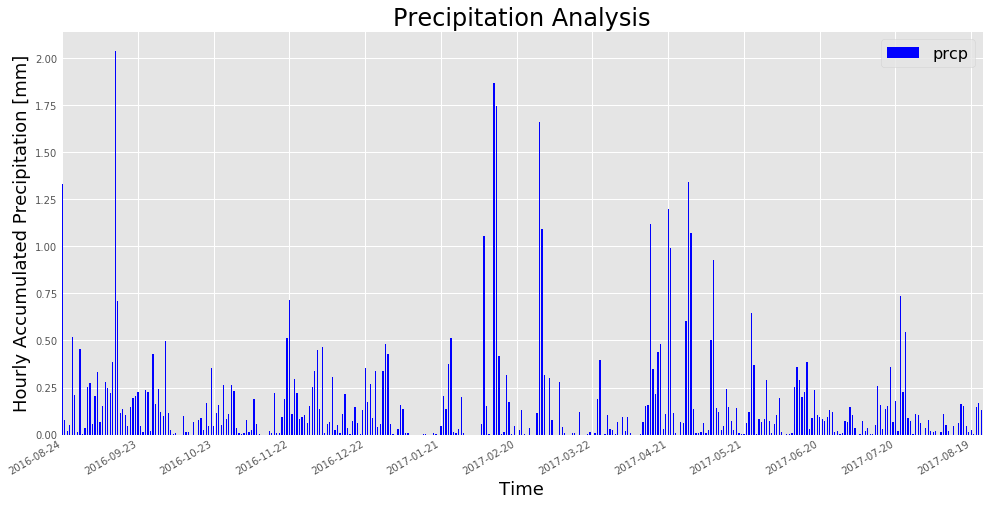

In [62]:
# Plotting
plt.clf()
prcp_df.plot(y='prcp',kind='bar',edgecolor='none',figsize=(16,8),linewidth=2, color='blue')
plt.legend(prop={'size':16})
plt.subplots_adjust(left=.1, right=0.9, top=0.9, bottom=.1)
plt.title('Precipitation Analysis',fontsize=24)
plt.ylabel('Hourly Accumulated Precipitation [mm]',fontsize=18,color='black')
ax = plt.gca()
plt.gcf().autofmt_xdate()

# skip ticks for X axis
#ax.set_xticklabels([dt.strftime('%Y-%m-%d') for dt in prcp_df.index])
for i, tick in enumerate(ax.xaxis.get_major_ticks()):
    if (i % (30) != 0): # 24 hours * 7 days = 1 week
        tick.set_visible(False)

plt.xlabel('Time',fontsize=18,color='black')

plt.show()